In [1]:
#HYBRID DEEP LEARNING MODEL


#PART 1 - IDENTIFY FRAUDS WITH SELF-ORGANIZING MAP

#PART 2 - GOING FROM UNSUPERVISED TO SUPERVISED DEEP LEARNING

#USE RESULTS OF SOM AS INPUTS FOR SUPERVISED MODEL
#PROBABILITIES OF BEING FRAUD FOR EACH CUSTOMER

In [2]:
#PART 1 - UNSUPERVISED DEEP LEARNING BRANCH: SOM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#MINISOM CONTAINS AN IMPLEMENTATION OF SOM
from minisom import MiniSom

df = pd.read_csv("Credit_Card_Applications.csv")

X = df.iloc[:, :-1].values #ALL COLUMNS EXCEPT LAST
y = df.iloc[:, -1].values

#FEATURE SCALING: NORMALISATION
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

#INITIALISE THE SOM
som = MiniSom(
    x=10, y=10, #DIMENSION OF GRID
    input_len = 15, #NUMBER OF FEATURES IN X
    sigma = 1.0, #RADIUS OF NEIGHBORHOOD
    learning_rate = 0.5, #WEIGHT UPDATION 
)

#INITIALISE THE WEIGHTS OF SOM [COORDINATES OF OUTPUT NODES]
som.random_weights_init(X) #DATA FOR TRAINING
som.train_random(
    data = X, #TRAINING DATA
    num_iteration = 100
)

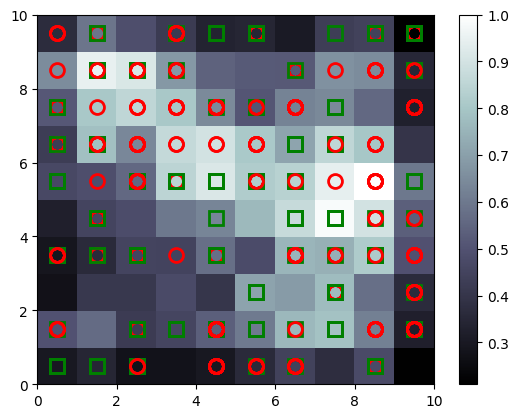

In [5]:
#VISUALISE THE RESULTS: PLOT THE SOM: COLOR BASED ON MID
from pylab import bone, pcolor, colorbar, plot, show

#INITIALISE FIGURE
bone()

#ADD INFORMATION ON MID: COLORS FOR RANGES
pcolor(som.distance_map().T) #TRANSPOSE OF MID

#ADD A LEGEND
colorbar() #NORMALISED MID VALUES

#ADD MARKERS USING LABELS: APPROVED OR NOT APPROVED
markers = ['o', 's'] #CIRCLE & SQUARE
colors = ['r', 'g'] #RED OR GREEN

for i, x in enumerate(X): #GET INDEX & DATA
    #GET WINNING NODE FOR RECORD
    w = som.winner(x)
    
    #PLACE MARKER
    plot(
        w[0]+0.5, w[1]+0.5, #COORDINATES OF CENTER OF NODE
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2
        
    )
show()

In [9]:
#RELEVANT FRAUDS ARE THOSE WHO GOT APPROVED
#GET LIST OF CUSTOMERS BY INVERSE-MAPPING

#GET MAPPINGS
mappings = som.win_map(X) # NODE: LIST OF CUSTOMERS

#NODE1: 8, 5. [BOTTOM LEFT POINT]
#NODE2: 1, 8
frauds1 = mappings[(8,5)]
frauds2 = mappings[(1,8)] #LIST OF CUSTOMERS WITH THAT WINNING NODE
frauds = np.concatenate((frauds1, frauds2), axis = 0) #VERTICAL CONCATENATION
frauds = np.concatenate((frauds, mappings[(7,4)]), axis = 0) #VERTICAL CONCATENATION

In [10]:
#LIST OF PROBABLE FRAUDS
frauds = sc.inverse_transform(frauds)

In [ ]:
#GO FROM UNSUPERVISED TO SUPERVISED: NEED A DEPENDENT VARIABLE
